Wyznaczone współczynniki:
a = 2.2887
b = 4.5773


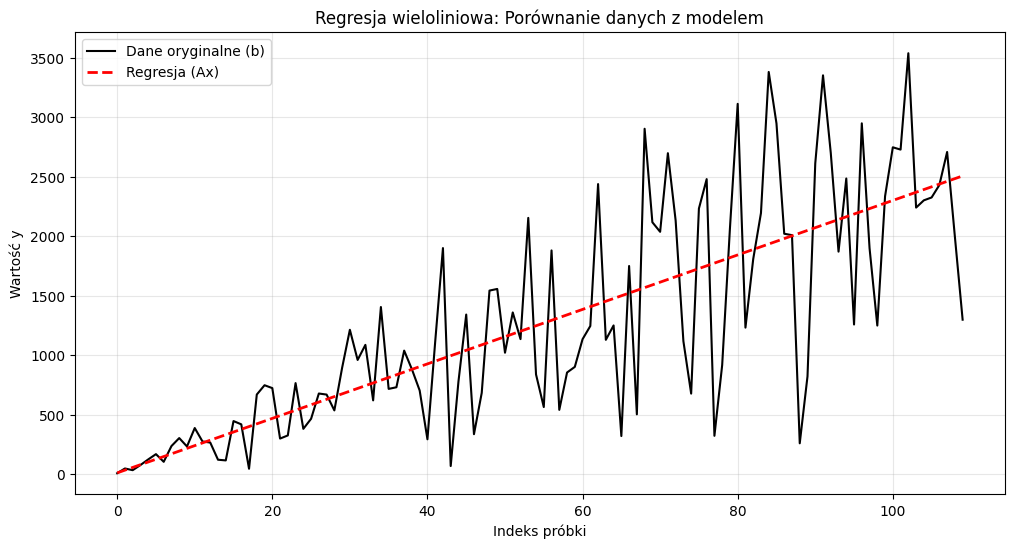

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = 'war8.csv'
data = pd.read_csv(file_path, sep=';', header=None, decimal=',')

x1 = data[0].values
x2 = data[1].values
y = data[2].values

A = np.column_stack((x1, x2))
b = y.reshape(-1, 1)

U, S, VT = np.linalg.svd(A, full_matrices=False)

x_tilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

x_pinv = np.linalg.pinv(A) @ b

a_coeff, b_coeff = x_pinv.flatten()

print(f"Wyznaczone współczynniki:")
print(f"a = {a_coeff:.4f}")
print(f"b = {b_coeff:.4f}")

y_pred = A @ x_pinv

plt.figure(figsize=(12, 6))
plt.plot(y, color='black', linewidth=1.5, label='Dane oryginalne (b)')
plt.plot(y_pred, '--', color='red', linewidth=2, label='Regresja (Ax)')
plt.title('Regresja wieloliniowa: Porównanie danych z modelem')
plt.xlabel('Indeks próbki')
plt.ylabel('Wartość y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regresja_zadanie2.png')
plt.show()
